In [4]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, mpld3, scipy.special as ss, scipy.integrate as integrate
mpld3.enable_notebook()
from IPython.html.widgets import interact

<function __main__.gamma_plot>

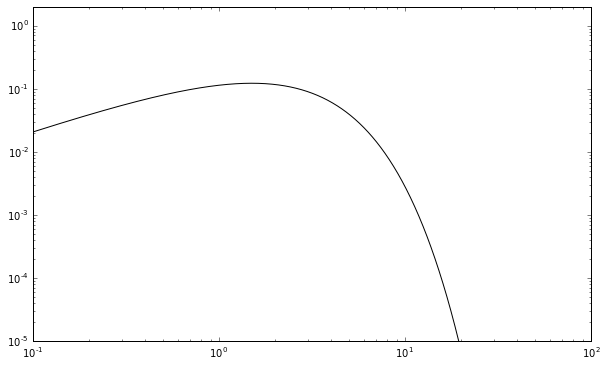

In [10]:
def gamma_plot(mean_rain, lamda, gamma):
    plt.figure(figsize=(10,6))
    # define parameters
    alpha = mean_rain/lamda # mean intensity
    beta = gamma/alpha # scale parameter
    # define x and f(x)
    x = np.logspace(-2,2,3000)
    f = lambda x: lamda * (beta**gamma) / ss.gamma(gamma) * x**(gamma - 1.) * np.exp(-beta * x)
    
    # plot function
    plt.loglog(x,f(x), 'k')
    plt.ylim([1e-5, 2])
    plt.xlim([0.1, 1e2])
    
interact(gamma_plot, mean_rain=(0.25,3,0.25), lamda=(0.1,1.0,0.1), gamma=(0.2,4,0.2))

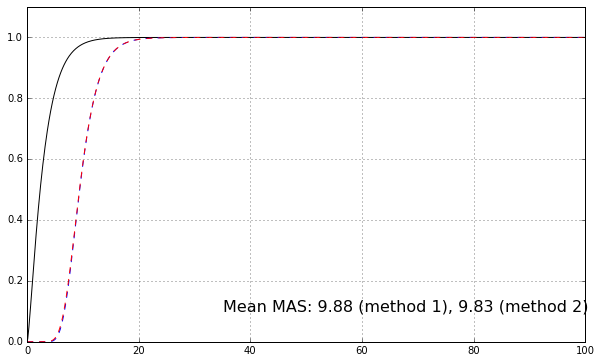

In [11]:
def storm_size_plot(mean_rain, lamda, gamma, Tw):
    plt.figure(figsize=(10,6))
    # set parameters
    alpha = mean_rain/lamda # mean intensity
    # set x and cdf of x and cdf of seasonal x
    x = np.linspace(0,100,1000)
    cdfx = lambda x: ss.gammainc(gamma, gamma*x/alpha)
    cdfy = lambda x: ss.gammainc(gamma, gamma*x/alpha)**(lamda*Tw)
    cdfy2 = lambda x: np.exp(-lamda*Tw*(1. - ss.gammainc(gamma, gamma*x/alpha)))
    # plot results
    plt.plot(x, cdfx(x), 'k')
    plt.plot(x, cdfy(x), 'b--')
    plt.plot(x, cdfy2(x), 'r--')
    plt.grid()
    plt.ylim([1e-5,1.1])
    plt.xlim([0,100])
    # mean annual storm size
    mean_max_1 = integrate.quad(lambda x: 1. - ss.gammainc(gamma, gamma*x/alpha)**(lamda*Tw), 0, np.inf)[0]
    mean_max_2 = integrate.quad(lambda x: 1. - np.exp(-lamda*Tw*(1. - ss.gammainc(gamma, gamma*x/alpha))), 0, np.inf)[0]
    plt.text(35, 0.1, 'Mean MAS: %2.2f (method 1), %2.2f (method 2)' % (mean_max_1, mean_max_2),
            ha='left', fontsize=16)
    
interact(storm_size_plot, mean_rain=(0.25,3,0.25), lamda=(0.1,1.0,0.1), gamma=(0.1,3,0.1), Tw=(10,100,10))